module 'kv_template' has no attribute 'dataset_info'
Loaded dataset with 1427 elements
loading model: /root/autodl-fs/internlm


INFO:accelerate.utils.modeling:We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Some weights of the model checkpoint at /root/autodl-fs/internlm were not used when initializing InternLMForCausalLM: ['model.layers.26.self_attn.rotary_emb.inv_freq', 'model.layers.23.self_attn.rotary_emb.inv_freq', 'model.layers.8.self_attn.rotary_emb.inv_freq', 'model.layers.25.self_attn.rotary_emb.inv_freq', 'model.layers.12.self_attn.rotary_emb.inv_freq', 'model.layers.4.self_attn.rotary_emb.inv_freq', 'model.layers.14.self_attn.rotary_emb.inv_freq', 'model.layers.28.self_attn.rotary_emb.inv_freq', 'model.layers.22.self_attn.rotary_emb.inv_freq', 'model.layers.15.self_attn.rotary_emb.inv_freq', 'model.layers.16.self_attn.rotary_emb.inv_freq', 'model.layers.10.self_attn.rotary_emb.inv_freq', 'model.layers.13.self_attn.rotary_emb.inv_freq', 'model.layers.21.self_attn.rotary_emb.inv_freq', 'model.layers.27.self_attn.rotary_emb.inv_freq', 'model.layers.2.self_attn.rotary_emb.inv_freq', 'model.layers.29.self_attn.rotary_emb.inv_freq', 'model.layers.20.self_attn.rotary_emb.inv_freq', 'm

/root/autodl-fs/internlm model loaded


Getting coarse neurons for each prompt...: 100%|██████████| 1/1 [00:05<00:00,  5.10s/it]



0 coarse neurons found - refining
0 neurons remaining after refining


Getting top tokens for neurons: 100%|██████████| 5/5 [00:00<00:00, 24.49it/s]


{'output': 'Franche-Comté', 'image': [], 'table': [{'table_name': 'Top neuron and relative tokens', 'table_list': [{'Top neurons': 'L0.U1', 'Corresponding top tokens': [' visited', ' played', ' talked'], 'Unemb Corresponding top tokens': ['lest', 'agues', 'essa']}, {'Top neurons': 'L0.U0', 'Corresponding top tokens': [' assurance', ' assured', ' critical'], 'Unemb Corresponding top tokens': ['eso', 'ono', 'ERN']}, {'Top neurons': 'L0.U2', 'Corresponding top tokens': ['ald', ' ve', ' portal'], 'Unemb Corresponding top tokens': [' ie', ' cann', 'ny']}, {'Top neurons': 'L0.U4', 'Corresponding top tokens': [' terms', ' referring', ' deemed'], 'Unemb Corresponding top tokens': ['ough', 'ae', 'alc']}, {'Top neurons': 'L0.U3', 'Corresponding top tokens': [' battery', ' Battery', ' batteries'], 'Unemb Corresponding top tokens': ['ets', 'erton', ' Factory']}], 'table_des': "We decode the semantic information of the neurons ranked in the top 5 using the model's embedding layer and unembedding la

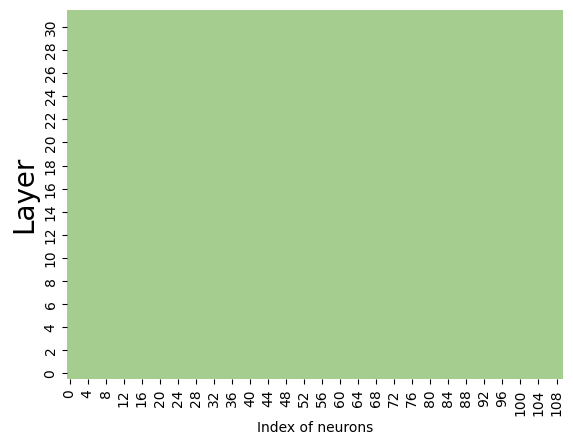

In [1]:
from diagnose import diagnose
from dataset_process import knowns, ZsRE, counterfact, pararel, PEP3k, TwentyQ
from models import llama, gptj, gpt2, bert, qwen, chatglm2, internlm, baichuan
from methods import kn
import torch

# dataset = knowns.KnownsDataset(loc=knowns.default_loc)
# sample = knowns.get_processed_kvs(dataset[0], kn.requires_input_keys)
# dataset = ZsRE.ZsREDataset(loc=ZsRE.default_loc)
# sample = ZsRE.get_processed_kvs(dataset[0], kn.requires_input_keys)
dataset = counterfact.CounterfactDataset(loc=counterfact.default_loc)
sample = counterfact.get_processed_kvs(dataset[0], kn.requires_input_keys)
result = diagnose.diagnosing(sample=sample, model_name_or_path=internlm, method=kn.name)

print(result)